# Task 2
## Adoption of Mudata to store multimodal data and metadata through Perturb-tools

__|use this jupyter in your home directory|__

## Relevance:
To analyze Perturb-seq experiments is necessary to be able to handle multiple tables with different data and metadata.  
MuData data is a format that allows having all these tables (Guide counts, Transcripts counts, Hashing/multiseq and Metadata)   
in the same data entity and share between different languages:  Python  (https://mudata.readthedocs.io) and R (https://www.bioconductor.org/packages/release/bioc/html/MuData.html).  
Additionally we can provide this MuData  to scripts generating pipeline reports to downstream tasks such as differential Perturbation quantification.

## Practical description: TODO
- [ ] Extend MuData Object and create a new class
- [ ] Add  in_trans gene selection. Given a guide select the closest genes ex: 1MB upstream and downstream
- [ ] Extract info relatade to a guide from the MuData object. ex: Given a guide x,  can we extract that guide presence for all cells, extract the counts for each gene being tested  for that guide?
- [ ] How to handle negative, positive, controls? Can we subset the MuData object to have only the guides of interest for a given category? How to inject this information in the MuData object?
- [ ] Visualization/object string representation? 

## Important links:
Example of class to handle scPERTURB-seq data proposing new operations :
https://colab.research.google.com/drive/1g8oeUkGWOolGc0MeXQ8CseBHwqXHbVPk#scrollTo=iHm0DR23kv4V

In [ ]:
!find  /mnt/shared/gasperini_test_01  | grep raw_mudata

/mnt/shared/gasperini_test_01/93/bc121425eff99125ff0ca316ceb0e7/raw_mudata_guide_and_transcripts.h5mu
/mnt/shared/gasperini_test_01/58/17b340883b2930787a95d103627184/raw_mudata_guide_and_transcripts.h5mu
/mnt/shared/gasperini_test_01/6c/fccd5ca9e34c8034064586053cca0c/raw_mudata_guide_and_transcripts.h5mu
/mnt/shared/gasperini_test_01/3d/400711732bb7fead7f4a800d77456f/raw_mudata_guide_and_transcripts.h5mu


In [ ]:
!pwd

/home/jovyan


In [ ]:
%%writefile mu_mod_workflow_test.nf
params.MUDATA_INPUT = '/mnt/shared/gasperini_test_01/93/bc121425eff99125ff0ca316ceb0e7/raw_mudata_guide_and_transcripts.h5mu'  

process mudata_mod {
    debug true
    input:
    path mudata    
    script:
    """
    chmod 700 /home/jovyan/my_mu_mod.py
    /home/jovyan/my_mu_mod.py ${mudata}
    """
    
}

workflow {
    
    mudata_mod_ou = mudata_mod(params.MUDATA_INPUT)


}

Writing mu_mod_workflow_test.nf


In [ ]:
!pwd

/home/jovyan


In [ ]:
%%writefile my_mu_mod.py
#!/usr/bin/env python

import sys
import mudata as md
print ('-----')
print (sys.argv[1])

mudata = md.read(sys.argv[1])



print(mudata['guides'])
print(mudata['scRNA'])

#create a class that can addhandle scPERTURB-SEQ mudata (gudie - scRNA)

Writing my_mu_mod.py


In [ ]:
!nextflow run mu_mod_workflow_test.nf -w testing_mu_mod_workflow_test

N E X T F L O W  ~  version 22.10.6
Launching `mu_mod_workflow_test.nf` [fabulous_lamarck] DSL2 - revision: f6aeede884
[-        ] process > mudata_mod -

executor >  local (1)
[5b/9497ce] process > mudata_mod [  0%] 0 of 1

executor >  local (1)
[5b/9497ce] process > mudata_mod [100%] 1 of 1 ✔
-----
raw_mudata_guide_and_transcripts.h5mu
AnnData object with n_obs × n_vars = 5109 × 98
    obs: 'number_of_nonzero_guides', 'batch_number'
    var: 'feature_name', 'guide_chr', 'guide_end', 'guide_start', 'guide_number', 'target_elements'
AnnData object with n_obs × n_vars = 5109 × 16094
    obs: 'n_genes', 'n_counts', 'percent_mito', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'batch_number'
    var: 'feature_name', 'n_cells', 'transcript_chr', 'transcript_start', 'transcript_end'




# Sandbox for task 2

## Loading data

In [ ]:
import scanpy as sc
import mudata as md
import matplotlib as plt
import seaborn as sns
from scipy.sparse import dok_matrix
import numpy as np

In [ ]:
mdata = md.read_h5mu("/mnt/shared/gasperini_test_01/93/bc121425eff99125ff0ca316ceb0e7/raw_mudata_guide_and_transcripts.h5mu")

In [ ]:
mdata

MuData object with n_obs × n_vars = 5109 × 16192
  var:	'feature_name'
  2 modalities
    guides:	5109 x 98
      obs:	'number_of_nonzero_guides', 'batch_number'
      var:	'feature_name', 'guide_chr', 'guide_end', 'guide_start', 'guide_number', 'target_elements'
    scRNA:	5109 x 16094
      obs:	'n_genes', 'n_counts', 'percent_mito', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'batch_number'
      var:	'feature_name', 'n_cells', 'transcript_chr', 'transcript_start', 'transcript_end'

In [ ]:
mdata.var["guides:target_elements"].value_counts()

BROX        2
OARD1       2
PCBD1       2
PLEKHJ1     2
PPID        2
PPP1R11     2
PSMG2       2
RBM17       2
RNF181      2
RPS3        2
RWDD1       2
SDHC        2
SEPT11      2
SLC25A4     2
SMARCC1     2
SPCS2       2
SRRM1       2
ST13        2
TMEM167A    2
TMEM242     2
TSPO        2
UAP1        2
UBE2T       2
ODC1        2
NEK2        2
CCND2       2
NDUFB7      2
CEBPB       2
CHRAC1      2
CITED2      2
COMT        2
DECR1       2
EBPL        2
EIF4EBP1    2
FAM83A      2
FECH        2
GATA2       2
GYPC        2
HBD         2
HNRNPA1     2
ITGB1BP1    2
JAGN1       2
LAMTOR1     2
LMO2        2
LRIF1       2
MAN1A1      2
MRPS35      2
MRPS36      2
VDAC1       2
Name: guides:target_elements, dtype: int64

## Subsetting

In [ ]:
mdata[:,mdata.var["guides:target_elements"] == "BROX"]

View of MuData object with n_obs × n_vars = 5109 × 2
  var:	'feature_name'
  2 modalities
    guides:	5109 x 2
      obs:	'number_of_nonzero_guides', 'batch_number'
      var:	'feature_name', 'guide_chr', 'guide_end', 'guide_start', 'guide_number', 'target_elements'
    scRNA:	5109 x 0
      obs:	'n_genes', 'n_counts', 'percent_mito', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'batch_number'
      var:	'feature_name', 'n_cells', 'transcript_chr', 'transcript_start', 'transcript_end'

## Using tools for scRNA-seq or guide counts

### scanpy for [scRNA-seq data QC](https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html)

In [ ]:
rna = mdata['scRNA']

In [ ]:
rna.var

,feature_name,n_cells,transcript_chr,transcript_start,transcript_end
ENSG00000238009,AL627309.1,79,NOT_FOUND,0,0
ENSG00000241860,AL627309.5,417,NOT_FOUND,0,0
ENSG00000228463,AP006222.1,240,NOT_FOUND,0,0
ENSG00000286448,AP006222.2,51,NOT_FOUND,0,0
ENSG00000237094,AL732372.2,90,NOT_FOUND,0,0
...,...,...,...,...,...
ENSG00000273748,AL592183.1,250,NOT_FOUND,0,0
ENSG00000278817,AC007325.4,58,NOT_FOUND,0,0
ENSG00000278384,AL354822.1,525,NOT_FOUND,0,0
ENSG00000276345,AC004556.3,3144,NOT_FOUND,0,0


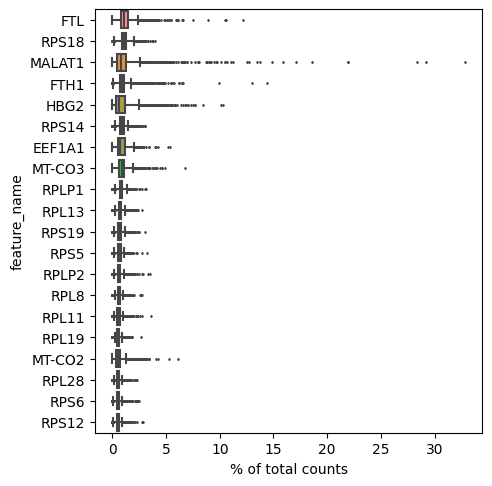

In [ ]:
sc.pl.highest_expr_genes(rna, n_top=20, gene_symbols = 'feature_name')

In [ ]:
sc.pp.filter_cells(rna, min_genes=200)
sc.pp.filter_genes(rna, min_cells=3)

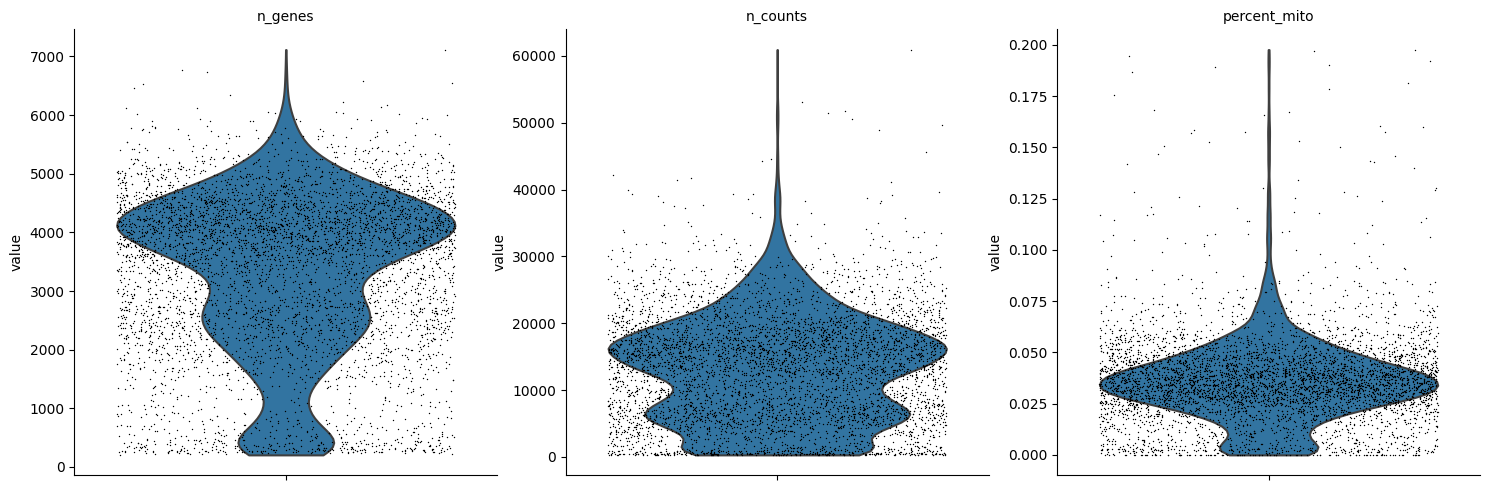

In [ ]:
sc.pl.violin(rna, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

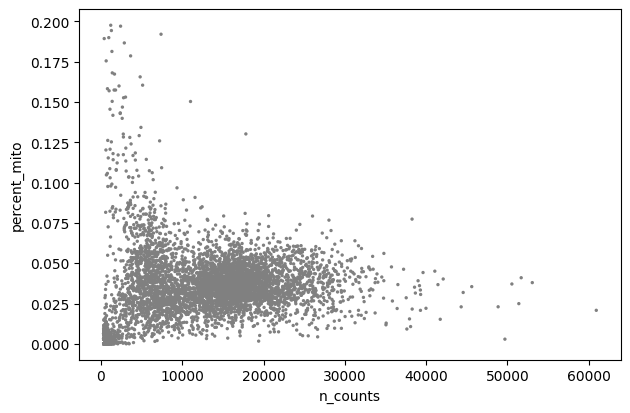

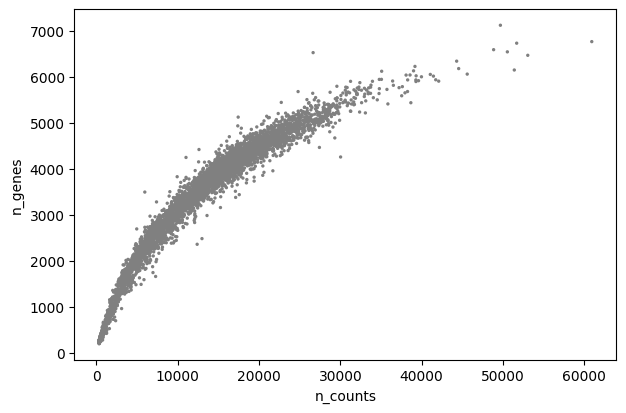

In [ ]:
sc.pl.scatter(rna, x='n_counts', y='percent_mito')
sc.pl.scatter(rna, x='n_counts', y='n_genes')

In [ ]:
rna

AnnData object with n_obs × n_vars = 5109 × 16094
    obs: 'n_genes', 'n_counts', 'percent_mito', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'batch_number'
    var: 'feature_name', 'n_cells', 'transcript_chr', 'transcript_start', 'transcript_end'

In [ ]:
mdata

MuData object with n_obs × n_vars = 5109 × 16192
  var:	'feature_name'
  2 modalities
    guides:	5109 x 98
      obs:	'number_of_nonzero_guides', 'batch_number'
      var:	'feature_name', 'guide_chr', 'guide_end', 'guide_start', 'guide_number', 'target_elements'
    scRNA:	5109 x 16094
      obs:	'n_genes', 'n_counts', 'percent_mito', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'batch_number'
      var:	'feature_name', 'n_cells', 'transcript_chr', 'transcript_start', 'transcript_end'

In [ ]:
filtered_mdata = mdata[rna.obs.n_genes < 6500, :]
filtered_mdata = mdata[rna.obs.percent_mito < 0.1, :]
filtered_mdata

View of MuData object with n_obs × n_vars = 5039 × 16192
  var:	'feature_name'
  2 modalities
    guides:	5039 x 98
      obs:	'number_of_nonzero_guides', 'batch_number'
      var:	'feature_name', 'guide_chr', 'guide_end', 'guide_start', 'guide_number', 'target_elements'
    scRNA:	5039 x 16094
      obs:	'n_genes', 'n_counts', 'percent_mito', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'batch_number'
      var:	'feature_name', 'n_cells', 'transcript_chr', 'transcript_start', 'transcript_end'

In [ ]:
rna = filtered_mdata.mod['scRNA']
sc.pp.normalize_total(rna, target_sum=1e4)
sc.pp.log1p(rna)
sc.pp.highly_variable_genes(rna, )

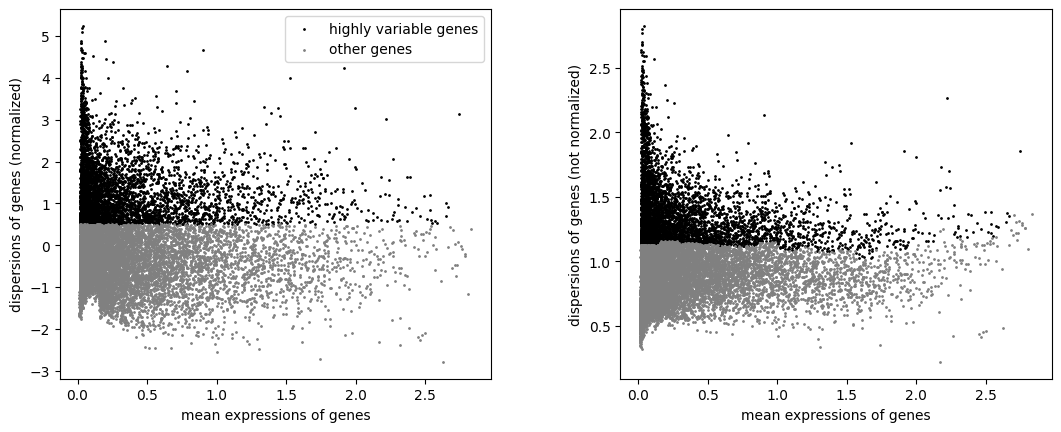

In [ ]:
sc.pl.highly_variable_genes(rna)

### scanpy for sgRNA QC

In [ ]:
guides = filtered_mdata.mod['guides']

In [ ]:
guides

View of AnnData object with n_obs × n_vars = 5039 × 98
    obs: 'number_of_nonzero_guides', 'batch_number'
    var: 'feature_name', 'guide_chr', 'guide_end', 'guide_start', 'guide_number', 'target_elements'

In [ ]:
sc.pp.filter_cells(guides, min_genes=0)
sc.pp.filter_genes(guides, min_cells=0)

/opt/conda/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


##### MOI

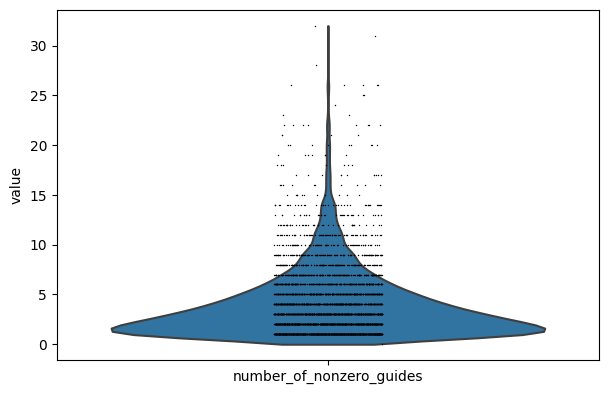

In [ ]:
sc.pl.violin(guides, ['number_of_nonzero_guides',])

<Axes: xlabel='number_of_nonzero_guides', ylabel='Count'>

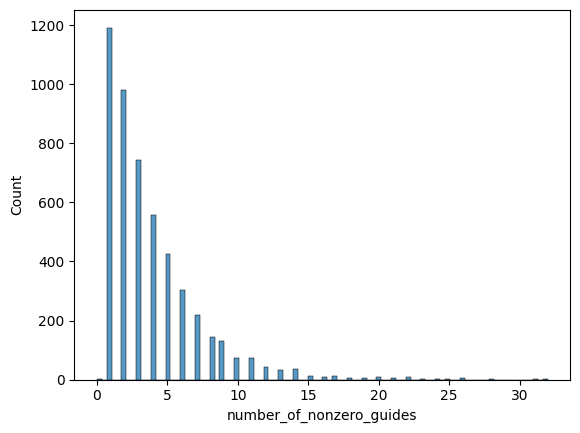

In [ ]:
sns.histplot(guides.obs['number_of_nonzero_guides'])

##### Guide coverage

<Axes: xlabel='n_cells', ylabel='Count'>

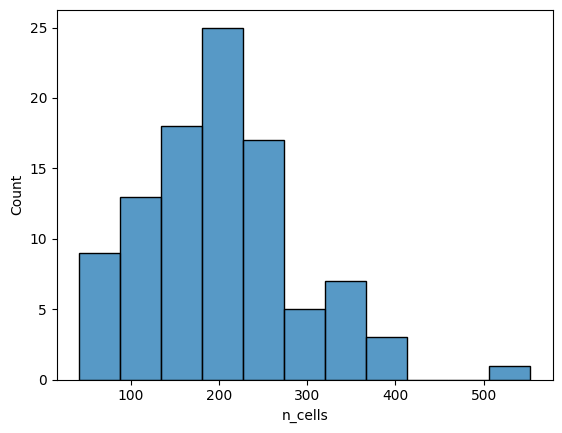

In [ ]:
sns.histplot(guides.var['n_cells'])

##### Element coverage

<Axes: xlabel='n_cells', ylabel='Count'>

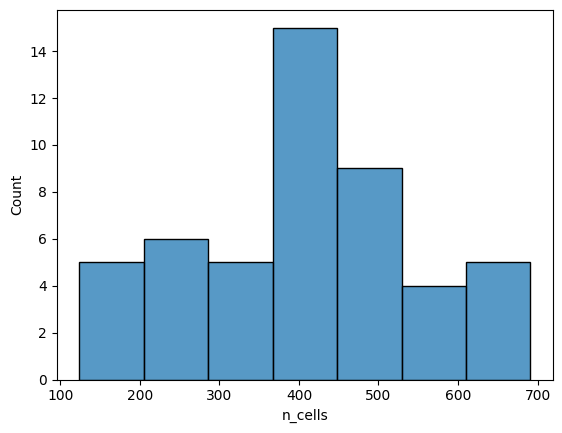

In [ ]:
sns.histplot(guides.var.groupby("target_elements")['n_cells'].sum())

##### QC involving positive/negative controls?

## Encoding relationship between guides and genes

- Option 1. Create anndata and put it inside .uns
- Option 2. Use .varm of mudata
- Option 3. Create new data structure that inherits anndata/mudata that supports AxB, AxC, BxC arrays

In [ ]:
!pip install git+https://github.com/IGVF-CRISPR/sccrispr-tools.git@distance_calculation

  Cloning https://github.com/IGVF-CRISPR/sccrispr-tools.git (to revision distance_calculation) to /tmp/pip-req-build-zoz5nk5k
  Running command git clone --filter=blob:none --quiet https://github.com/IGVF-CRISPR/sccrispr-tools.git /tmp/pip-req-build-zoz5nk5k
  Running command git checkout -b distance_calculation --track origin/distance_calculation
  Switched to a new branch 'distance_calculation'
  Branch 'distance_calculation' set up to track remote branch 'distance_calculation' from 'origin'.
  Resolved https://github.com/IGVF-CRISPR/sccrispr-tools.git to commit 59cbab822e30d8a990046f9d234d844e7df6b92b
  Preparing metadata (setup.py) ... done


In [ ]:
from sccrispr_tools.tools.calculate_distance import calculate_distance

mdata doesn't seem to support syncing column assignment?

In [ ]:
mdata['scRNA'].var['chrom'] = mdata.var['scRNA:transcript_chr'].map(lambda s: f"chr{s}" if s != "NOT_FOUND" else s)
mdata['scRNA'].var['start'] = mdata['scRNA'].var.transcript_start
mdata['scRNA'].var['end'] = mdata['scRNA'].var.transcript_end
mdata['guides'].var['chrom'] = mdata['guides'].var.guide_chr
mdata['guides'].var['start'] = mdata['guides'].var.guide_start
mdata['guides'].var['end'] = mdata['guides'].var.guide_end

mdata.var['scRNA:chrom'] = mdata.var['scRNA:transcript_chr'].map(lambda s: f"chr{s}" if s != "NOT_FOUND" else s)
mdata.var['scRNA:start'] = mdata.var['scRNA:transcript_start']
mdata.var['scRNA:end'] = mdata.var['scRNA:transcript_end']
mdata.var['guides:chrom'] = mdata.var['guides:guide_chr']
mdata.var['guides:start'] = mdata.var['guides:guide_start']
mdata.var['guides:end'] = mdata.var['guides:guide_end']

In [ ]:
calculate_distance(mdata, 'guides', 'scRNA', chrom_col='chrom')

/opt/conda/lib/python3.10/site-packages/sccrispr_tools/tools/calculate_distance.py:34: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  == mdata[mod2].var[chrom_col].astype(str)[None, :]


In [ ]:
mdata.varp['same_chrom']

In [ ]:
mdata.varp['distance']

In [ ]:
# Visualize result


In [ ]:
# Extract/assign cis element assignment


In [ ]:
mdata.varp['cis'] = NotImplemented #mdata.varp['distance'] < 1e6